# Pre - Processing Data to be used in Matlab

In [128]:
# Import Libraries
import numpy as np
import pandas as pd

# Data Vis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import matplotlib.style as style
style.use('fivethirtyeight')

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

# We can also use whitegrid style for our seaborn plots.( most basic one )
sns.set(style='white', context='notebook', palette='deep') 

# File system manangement
import os
    
def glimpse(df, maxvals=10, maxlen=110):
    print('Shape: ', df.shape)
    print('')
    print(df.dtypes.value_counts())
    print('')
    def pad(y):
        max_len = max([len(x) for x in y])
        return [x.ljust(max_len) for x in y]
    
    # Column Name
    toprnt = pad(df.columns.tolist())
    
    # Column Type
    toprnt = pad([toprnt[i] + ' ' + str(df.iloc[:,i].dtype) for i in range(df.shape[1])])
    
    # Num NAs
    num_nas = [df.iloc[:,i].isnull().sum() for i in range(df.shape[1])]
    num_nas_ratio = [int(round(x*100/df.shape[0])) for x in num_nas]
    num_nas_str = [str(x) + ' (' + str(y) + '%)' for x,y in zip(num_nas, num_nas_ratio)]
    max_len = max([len(x) for x in num_nas_str])
    num_nas_str = [x.rjust(max_len) for x in num_nas_str]
    toprnt = [x + ' ' + y + ' NAs' for x,y in zip(toprnt, num_nas_str)]
    
    # Separator
    toprnt = [x + ' ; Unique ' for x in toprnt]
    
    # Values
    toprnt = [toprnt[i] + '('+str(df.iloc[:,i].nunique())+') : ' 
              +str(df.iloc[:,i].unique()[:5]) for i in range(df.shape[1])]
    
    # Trim to maxlen
    toprnt = [x[:min(maxlen, len(x))] for x in toprnt]
    
    for x in toprnt:
        print(x)
    display(df.describe())
    print('Head')
    display(df.head())
    print('Tail')
    display(df.tail())

In [129]:
## Converting txt files to csv for proper import in Matlab
#df = pd.read_csv('ethylene_methane.txt', delim_whitespace=True, skiprows=[0], header=None)
#df = df.rename(columns = {0:'Time (seconds)', 1:'Methane conc (ppm)', 2:'Ethylene conc (ppm)', 3:'Sensor1',4:'Sensor2',5:'Sensor3',6:'Sensor4',7:'Sensor5',8:'Sensor6',9:'Sensor7',10:'Sensor8',11:'Sensor9',12:'Sensor10',13:'Sensor11',14:'Sensor12',15:'Sensor13',16:'Sensor14',17:'Sensor15',18:'Sensor16'})
#ethylene_methane = df.to_csv ('ethylene_methane.csv', index = None, header=True)
#df = pd.read_csv('ethylene_CO.txt', delim_whitespace=True, skiprows=[0], header=None)
#df = df.rename(columns = {0:'Time (seconds)', 1:'CO conc (ppm)', 2:'Ethylene conc (ppm)', 3:'Sensor1',4:'Sensor2',5:'Sensor3',6:'Sensor4',7:'Sensor5',8:'Sensor6',9:'Sensor7',10:'Sensor8',11:'Sensor9',12:'Sensor10',13:'Sensor11',14:'Sensor12',15:'Sensor13',16:'Sensor14',17:'Sensor15',18:'Sensor16'})
#ethylene_CO = df.to_csv ('ethylene_CO.csv', index = None, header=True)

In [130]:
CO_data = pd.read_csv("ethylene_CO.csv")
target = ["CO conc (ppm)","Ethylene conc (ppm)"]
glimpse(CO_data)

Shape:  (4208261, 19)

float64    19
dtype: int64

Time (seconds)      float64 0 (0%) NAs ; Unique (4085589) : [0.   0.01 0.03 0.04 0.05]
CO conc (ppm)       float64 0 (0%) NAs ; Unique (21) : [  0.   533.33 200.   333.33 240.  ]
Ethylene conc (ppm) float64 0 (0%) NAs ; Unique (10) : [ 0.   16.67 10.    6.67 11.67]
Sensor1             float64 0 (0%) NAs ; Unique (11062) : [-50.85 -49.4  -40.04 -47.14 -33.58]
Sensor2             float64 0 (0%) NAs ; Unique (36903) : [ -1.95  -5.53 -16.09 -10.57 -20.79]
Sensor3             float64 0 (0%) NAs ; Unique (23651) : [-41.82 -42.78 -27.59 -32.28 -33.25]
Sensor4             float64 0 (0%) NAs ; Unique (23872) : [1.3  0.49 0.   4.4  6.03]
Sensor5             float64 0 (0%) NAs ; Unique (8553) : [ -4.07   3.58  -7.16 -11.22   3.42]
Sensor6             float64 0 (0%) NAs ; Unique (8848) : [-28.73 -34.55 -42.14 -37.94 -34.22]
Sensor7             float64 0 (0%) NAs ; Unique (24240) : [-13.49  -9.59 -12.52  -7.16 -14.46]
Sensor8             float64 0 

,Time (seconds),CO conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16
count,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06
mean,2.104459e+04,1.276202e+02,5.320436e+00,2.065617e+03,5.062184e+02,4.372539e+03,4.799250e+03,1.894957e+03,2.214692e+03,5.086639e+03,5.385428e+03,1.186241e+03,1.219252e+03,4.871079e+03,3.926250e+03,9.281877e+02,1.035772e+03,5.289323e+03,4.309685e+03
std,1.214998e+04,1.607772e+02,5.624127e+00,7.902609e+02,1.530128e+03,1.608018e+03,1.733017e+03,4.395373e+02,4.353987e+02,1.966451e+03,2.072383e+03,4.531719e+02,4.308765e+02,1.707681e+03,1.364496e+03,1.677561e+02,1.741085e+02,1.984057e+03,1.584038e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,-5.262000e+01,-3.649000e+01,-4.504000e+01,-8.940000e+00,-1.219000e+01,-4.214000e+01,-2.322000e+01,-1.382000e+01,1.597400e+02,2.153100e+02,8.622200e+02,8.654900e+02,6.095700e+02,6.738900e+02,5.467300e+02,4.885800e+02
25%,1.052123e+04,0.000000e+00,0.000000e+00,1.323470e+03,9.120000e+00,2.986960e+03,3.282310e+03,1.503460e+03,1.856650e+03,3.241950e+03,3.448620e+03,9.343300e+02,9.419200e+02,3.435680e+03,2.728930e+03,8.083400e+02,9.102500e+02,3.642120e+03,2.805070e+03
50%,2.104591e+04,0.000000e+00,6.670000e+00,1.789090e+03,3.889000e+01,4.494330e+03,4.946720e+03,1.984550e+03,2.272780e+03,5.224880e+03,5.537910e+03,1.140320e+03,1.176600e+03,5.016130e+03,4.120240e+03,9.298600e+02,1.060700e+03,5.320550e+03,4.543040e+03
75%,3.156678e+04,2.666700e+02,1.000000e+01,2.869440e+03,1.589000e+02,5.658290e+03,6.178210e+03,2.262740e+03,2.566470e+03,6.719280e+03,7.104200e+03,1.543660e+03,1.557780e+03,6.126830e+03,4.967480e+03,1.033490e+03,1.161370e+03,6.739320e+03,5.565070e+03
max,4.208755e+04,5.333300e+02,2.000000e+01,3.553640e+03,2.811651e+04,8.641340e+03,9.221020e+03,2.904040e+03,3.502110e+03,9.883500e+03,1.052104e+04,5.513995e+04,5.066950e+04,9.626260e+03,9.762620e+03,2.454402e+04,2.142068e+04,1.066530e+04,7.874490e+03


Head


,Time (seconds),CO conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16
0,0.00,0.0,0.0,-50.85,-1.95,-41.82,1.30,-4.07,-28.73,-13.49,-3.25,55139.95,50669.50,9626.26,9762.62,24544.02,21420.68,7650.61,6928.42
1,0.01,0.0,0.0,-49.40,-5.53,-42.78,0.49,3.58,-34.55,-9.59,5.37,54395.77,50046.91,9433.20,9591.21,24137.13,20930.33,7498.79,6800.66
2,0.01,0.0,0.0,-40.04,-16.09,-27.59,0.00,-7.16,-42.14,-12.52,-5.86,53960.02,49299.30,9324.40,9449.81,23628.90,20504.94,7369.67,6697.47
3,0.03,0.0,0.0,-47.14,-10.57,-32.28,4.40,-11.22,-37.94,-7.16,-1.14,53047.71,48907.00,9170.64,9305.58,23101.66,20101.42,7285.13,6578.52
4,0.04,0.0,0.0,-33.58,-20.79,-33.25,6.03,3.42,-34.22,-14.46,8.31,52700.28,48330.96,9073.64,9163.47,22689.54,19694.07,7156.74,6468.32


Tail


,Time (seconds),CO conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16
4208256,42087.51,0.0,0.0,1127.81,105.93,2117.39,2247.58,1207.59,1646.73,2089.97,2262.98,1061.70,1070.47,2570.33,2073.57,709.06,775.36,2513.75,1848.65
4208257,42087.52,0.0,0.0,1140.73,96.46,2105.93,2253.69,1216.39,1624.47,2073.57,2246.61,1063.89,1075.26,2580.88,2083.78,698.24,768.93,2511.20,1843.63
4208258,42087.53,0.0,0.0,1123.99,107.92,2111.18,2245.63,1215.36,1628.44,2085.45,2271.80,1059.31,1063.49,2583.20,2090.20,709.62,775.73,2510.18,1841.80
4208259,42087.54,0.0,0.0,1131.44,111.08,2114.76,2249.54,1197.99,1612.17,2078.32,2272.29,1063.69,1066.08,2578.56,2100.92,716.72,779.14,2508.91,1851.17
4208260,42087.55,0.0,0.0,1130.23,98.45,2107.12,2255.64,1211.07,1621.62,2085.92,2271.31,1071.07,1079.05,2577.28,2071.91,701.78,772.52,2530.08,1864.44


In [131]:
#methane_data = pd.read_csv("ethylene_methane.csv")
#target = ["Methane conc (ppm)","Ethylene conc (ppm)"]
#glimpse(methane_data)

Sensors readings can be converted to KOhms: 40.000/S_i, where S_i is the given value provided.

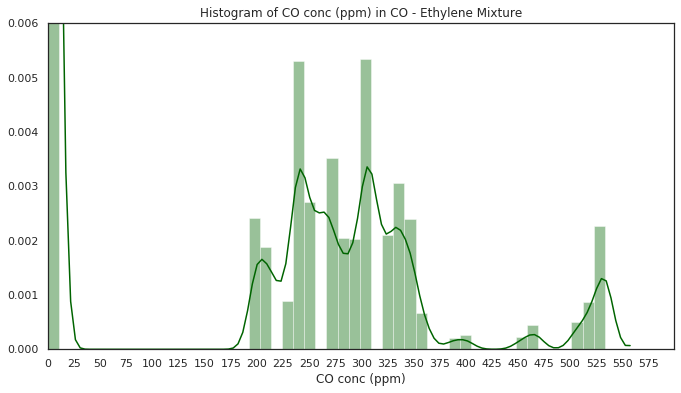

In [132]:
plt.figure(figsize=(10,6))
x = range(0,600,25)
sns.distplot(CO_data[target[0]], color="darkgreen", hist_kws={'alpha': 0.4})#, fit=norm)
plt.title('Histogram of %s in CO - Ethylene Mixture' % target[0])
plt.xticks(x)
plt.axis([0, 600, 0, 0.006])
plt.show()

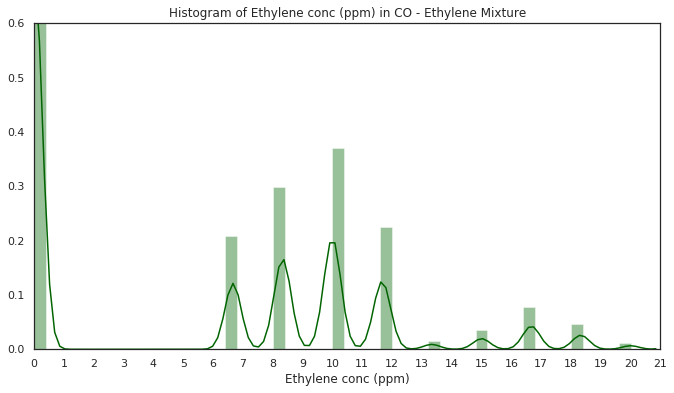

In [133]:
plt.figure(figsize=(10,6))
x = range(0,22,1)
sns.distplot(CO_data[target[1]], color='darkgreen', hist_kws={'alpha': 0.4})#, fit=norm)
plt.title('Histogram of %s in CO - Ethylene Mixture' % target[1])
plt.xticks(x)
plt.axis([0, 21, 0, 0.6])
plt.show()

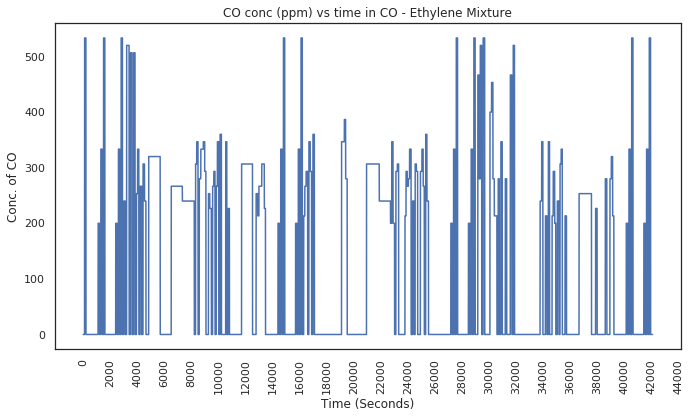

In [152]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data[target[0]])
plt.title('%s vs time in CO - Ethylene Mixture' % target[0])
plt.ylabel("Conc. of CO")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

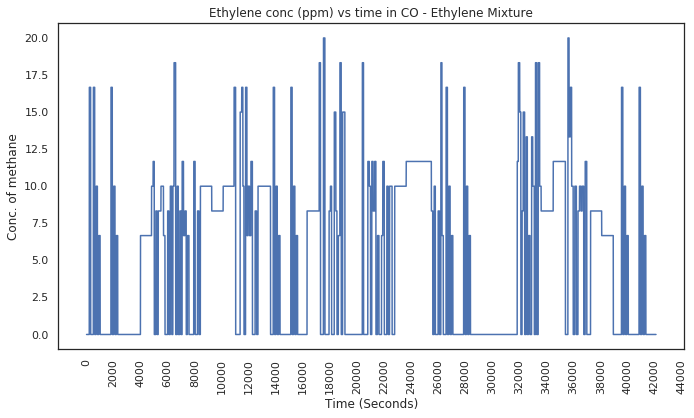

In [153]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data[target[1]])
plt.title('%s vs time in CO - Ethylene Mixture' % target[1])
plt.ylabel("Conc. of Ethylene")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

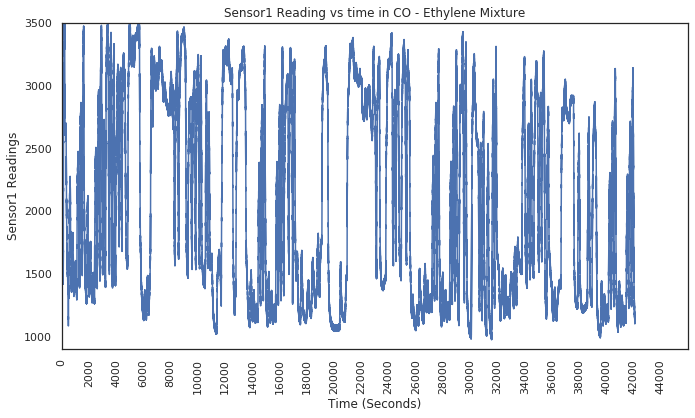

In [136]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor1"])
plt.title('Sensor1 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor1 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.axis([0,46000, 900, 3500])
plt.show()

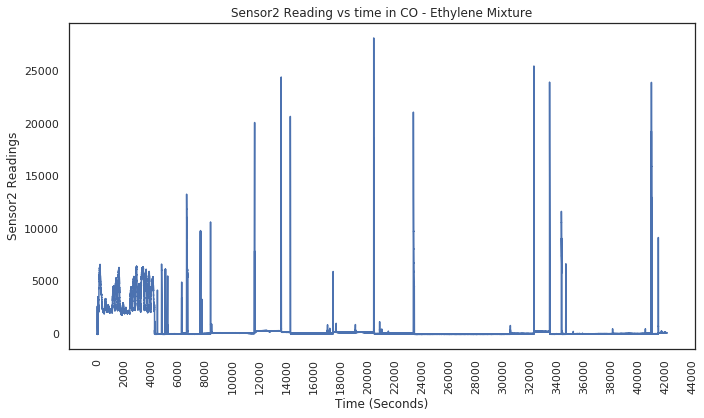

In [137]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor2"])
plt.title('Sensor2 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor2 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

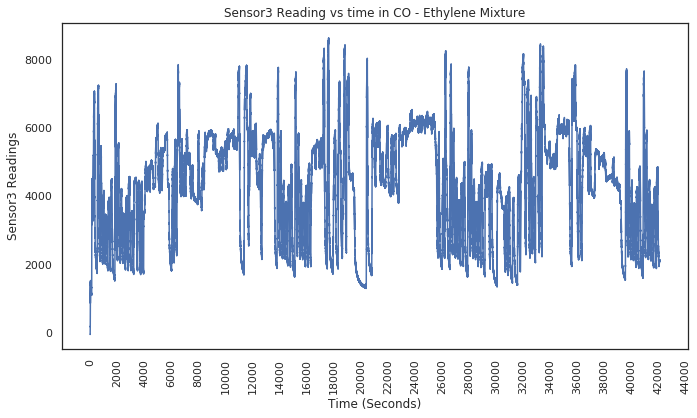

In [138]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor3"])
plt.title('Sensor3 Reading vs time in CO - Ethylene Mixture')
plt.ylabel("Sensor3 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

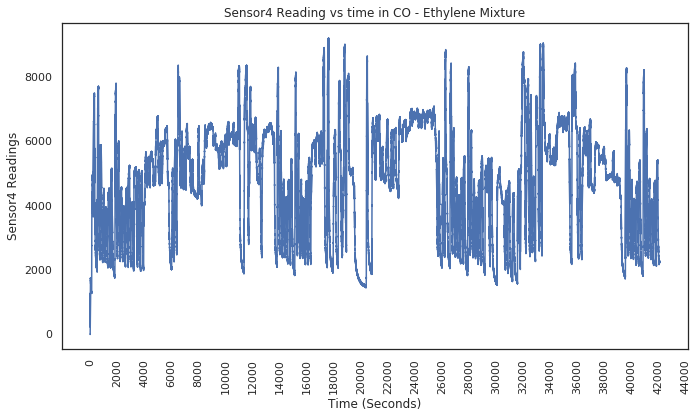

In [139]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor4"])
plt.title('Sensor4 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor4 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

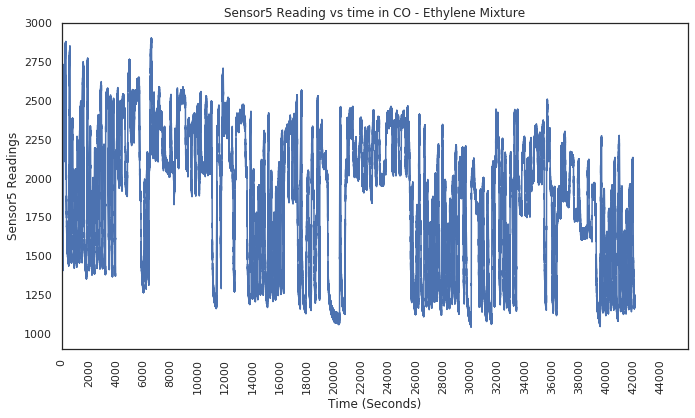

In [140]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor5"])
plt.title('Sensor5 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor5 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.axis([0,46000, 900, 3000])
plt.show()

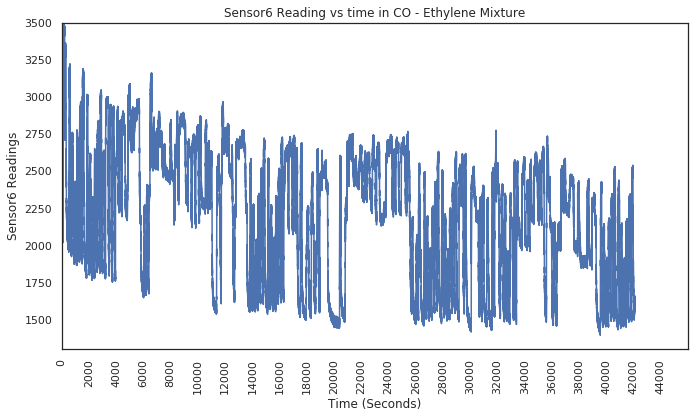

In [141]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor6"])
plt.title('Sensor6 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor6 Readings")
plt.xlabel("Time (Seconds)")
plt.axis([0,46000, 1300, 3500])
plt.xticks(x,rotation=90)
plt.show()

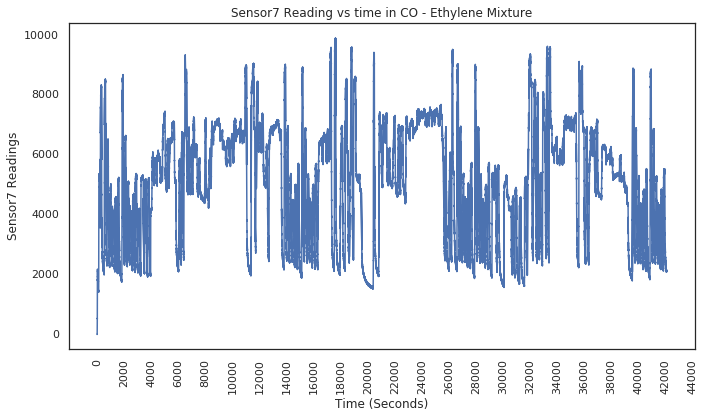

In [142]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor7"])
plt.title('Sensor7 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor7 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

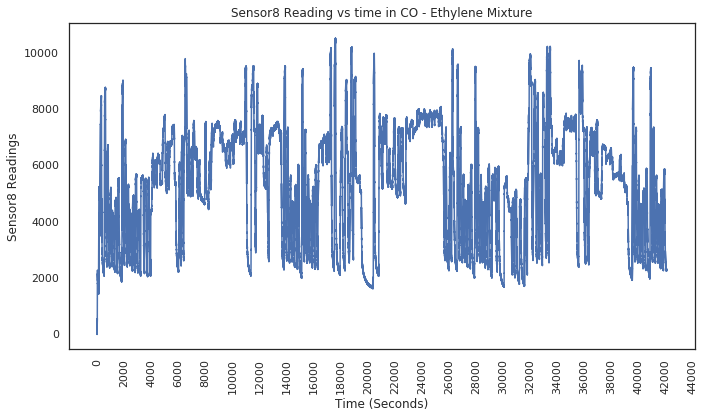

In [143]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor8"])
plt.title('Sensor8 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor8 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

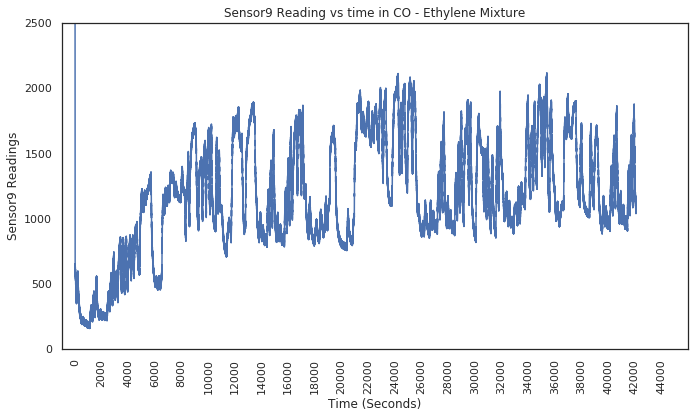

In [144]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor9"])
plt.title('Sensor9 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor9 Readings")
plt.xlabel("Time (Seconds)")
plt.axis([-1000,46000, 0, 2500])
plt.xticks(x,rotation=90)
plt.show()

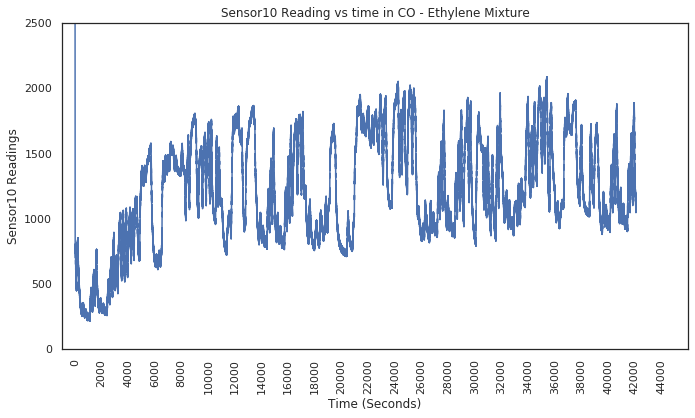

In [145]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor10"])
plt.title('Sensor10 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor10 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.axis([-1000,46000, 0, 2500])
plt.show()

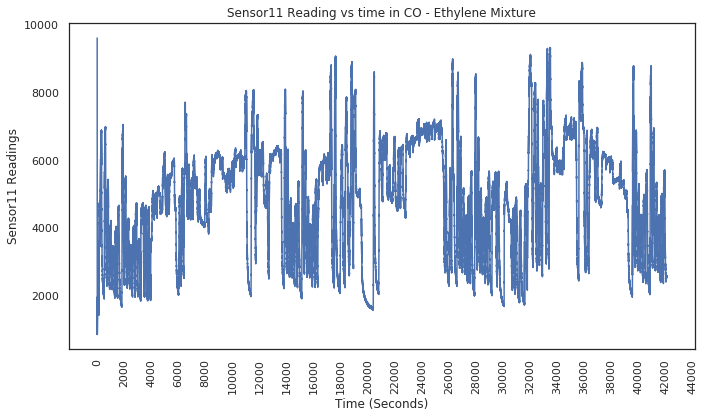

In [146]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor11"])
plt.title('Sensor11 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor11 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

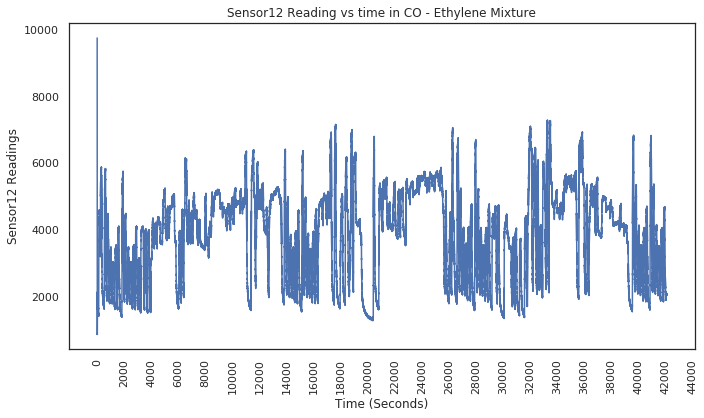

In [147]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor12"])
plt.title('Sensor12 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor12 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

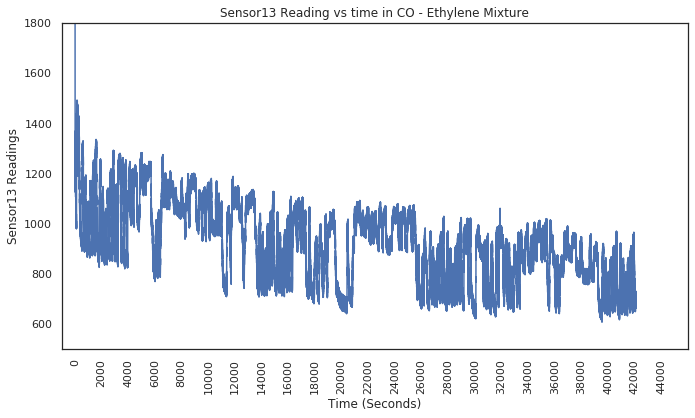

In [148]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor13"])
plt.title('Sensor13 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor13 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.axis([-1000,46000, 500, 1800])
plt.show()

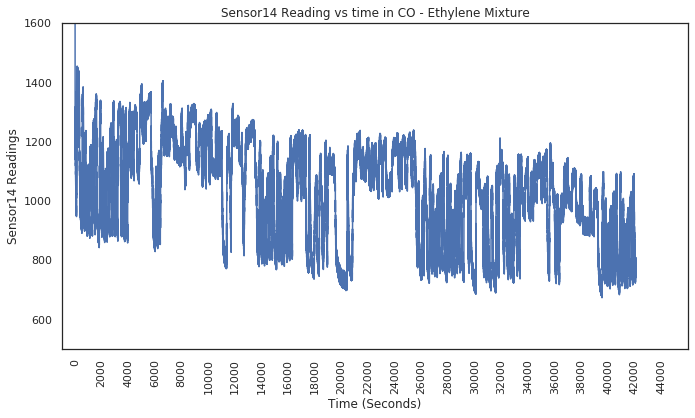

In [149]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor14"])
plt.title('Sensor14 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor14 Readings")
plt.xlabel("Time (Seconds)")
plt.axis([-1000,46000, 500, 1600])
plt.xticks(x,rotation=90)
plt.show()

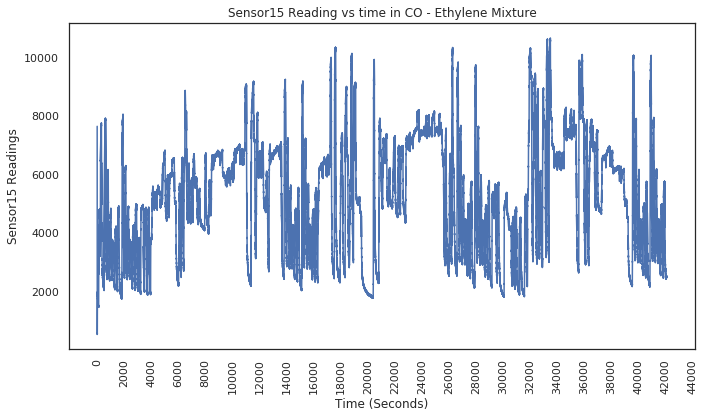

In [150]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor15"])
plt.title('Sensor15 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor15 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

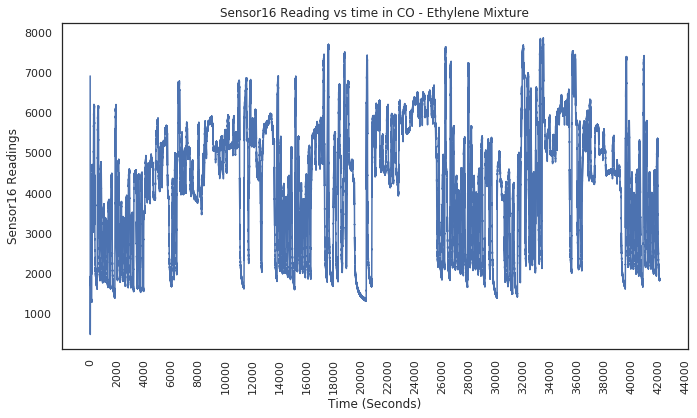

In [151]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor16"])
plt.title('Sensor16 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor16 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()